# JoSAA 2021 and 2020 comparision

## Standard imports

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import textwrap
import numpy as np
from bs4.element import Tag
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
f = open('./josaa-rounds/josaa-2020.html', 'r')
lines = f.read()
f.close()

soup = BeautifulSoup(lines, 'html.parser')
table = soup.findAll('table')
table = table[len(table)-1]
tableRows = table.find_all('tr')
headingRow: Tag
headingRow = tableRows[0]
tableRows.pop(0)
headingData = headingRow.find_all('th')

headings = []
i: Tag
for i in headingData:
    headings.append(i.get_text())

data = []
for i in tableRows:
    contentData = i.find_all('td')

    contents = []
    x: Tag
    for x in contentData:
        contents.append(x.get_text().replace('\n', '').strip())
    data.append(contents)

josaa2020 = pd.DataFrame(data,columns=headings)
# josaa2020.to_excel('./outputs/josaa-2020.xlsx',index=False)
josaa2020.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8816,11238
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),13312,15697


In [3]:
f = open('JoSAA.html', 'r')
lines = f.read()
f.close()

soup = BeautifulSoup(lines, 'html.parser')
table = soup.find('table')
tableRows = table.find_all('tr')
headingRow: Tag
headingRow = tableRows[0]
tableRows.pop(0)
headingData = headingRow.find_all('th')

headings = []
i: Tag
for i in headingData:
    headings.append(i.get_text())

data = []
for i in tableRows:
    contentData = i.find_all('td')

    contents = []
    x: Tag
    for x in contentData:
        contents.append(x.get_text().replace('\n', '').strip())
    data.append(contents)

josaa2021 = pd.DataFrame(data,columns=headings)
# output.to_excel('./outputs/josaa-2021.xlsx',index=False)
josaa2021.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8471,12396
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16998,21029


## Merging JoSAA 2020 data with JoSAA 2021 data
As it is quite obvious that JoSAA 2021 will contain newer entries due to new programs being introduced, so we will be appending entries for 2020 into 2021 dataframe!

In [4]:
josaa2020['Previous OR'] = josaa2020['Opening Rank']
josaa2020.drop('Opening Rank',inplace=True, axis=1)
josaa2020['Previous CR'] = josaa2020['Closing Rank']
josaa2020.drop('Closing Rank',inplace=True, axis=1)
josaa2020.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Previous OR,Previous CR
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8816,11238
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),13312,15697


In [5]:
josaa2020.shape, josaa2021.shape

((8991, 7), (9178, 7))

In [6]:
merged = josaa2021.merge(josaa2020,on=['Institute', 'Academic Program Name', 'Quota', 'Seat Type', 'Gender'],how='left')
merged.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Previous OR,Previous CR
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8471,12396,8816,11238
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16998,21029,13312,15697


So we have merged the two data into a combined single data! But we still need to remove the ranks which are non-numericic (Some ranks end with `P` and I don't have idea what it is)

In [7]:
merged = merged[merged['Opening Rank'].apply(lambda x: str(x).isdigit())]
merged = merged[merged['Closing Rank'].apply(lambda x: str(x).isdigit())]
merged = merged[merged['Previous OR'].apply(lambda x: str(x).replace('\n','').strip().isdigit())]
merged = merged[merged['Previous CR'].apply(lambda x: str(x).replace('\n','').strip().isdigit())]
merged = merged.reset_index(drop=True)
merged['Opening Rank'] = merged['Opening Rank'].astype(int)
merged['Closing Rank'] = merged['Closing Rank'].astype(int)
merged['Previous OR'] = merged['Previous OR'].astype(int)
merged['Previous CR'] = merged['Previous CR'].astype(int)
merged.dtypes

Institute                object
Academic Program Name    object
Quota                    object
Seat Type                object
Gender                   object
Opening Rank              int32
Closing Rank              int32
Previous OR               int32
Previous CR               int32
dtype: object

## Change in OR(s) & CR(s)

In [8]:
merged['Change in OR'] = merged['Previous OR'] - merged['Opening Rank']
merged['Change in CR'] = merged['Previous CR'] - merged['Closing Rank']
merged.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Previous OR,Previous CR,Change in OR,Change in CR
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,8471,12396,8816,11238,345,-1158
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16998,21029,13312,15697,-3686,-5332


## Analysis
1. Course which had higher demands/cutoffs compared to last year (for top teir colleges)
1. Course which had lower demands/cutoffs compared to last year (for top teir colleges)
1. Course which had higher demands/cutoffs compared to last year (for other teir colleges)
1. Course which had lower demands/cutoffs compared to last year (for other teir colleges)

### Course which had higher demands/cutoffs compared to last year (for top teir colleges)

In [9]:
course = merged[(merged['Previous CR']<15000)|(merged['Closing Rank']<15000)].groupby('Academic Program Name')
pd.DataFrame(course['Change in CR'].mean()).sort_values(by=['Change in CR'],ascending=False).head(10)

,Change in CR
Academic Program Name,
"Mathematics & Computing (5 Years, Bachelor of Science and Master of Science (Dual Degree))",2028.600000
"Electronics and Communication Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))",1638.750000
"Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)",1181.363636
"Food Process Engineering (4 Years, Bachelor of Technology)",1069.777778
"Industrial Design (4 Years, Bachelor of Technology)",982.300000
"Computer Science (4 Years, Bachelor of Technology)",920.800000
"Aerospace Engineering (4 Years, Bachelor of Technology)",754.450000
"Life Science (5 Years, Integrated Master of Science)",715.166667
"Bio Medical Engineering (4 Years, Bachelor of Technology)",704.611111


### Course which had lower demands/cutoffs compared to last year (for top teir colleges)

In [10]:
course = merged[(merged['Previous CR']<15000)|(merged['Closing Rank']<15000)].groupby('Academic Program Name')
pd.DataFrame(course['Change in CR'].mean()).sort_values(by=['Change in CR'],ascending=True).head(10)

,Change in CR
Academic Program Name,
"Engineering Physics (5 Years, Bachelor and Master of Technology (Dual Degree))",-1495.083333
"Food Engineering and Technology (4 Years, Bachelor of Technology)",-1384.333333
"Electrical and Instrumentation Engineering (4 Years, Bachelor of Technology)",-1343.000000
"Food Technology and Management (4 Years, Bachelor of Technology)",-1267.333333
"Agricultural Engineering (4 Years, Bachelor of Technology)",-1213.000000
"Engineering Science (4 Years, Bachelor of Technology)",-1080.555556
"Carpet and Textile Technology (4 Years, Bachelor of Technology)",-989.000000
"Biomedical Engineering (4 Years, Bachelor of Technology)",-936.000000
"Materials Science and Engineering (4 Years, Bachelor of Technology)",-902.640000


#### Result
In top tier colleges,
- Among 5 year courses `Mathematics & Computing` was at higher demand than before, followed by `Electronics and Communication Engineering`
- Among 4 year courses `Computer Science and Artificial Intelligence` was at higher demand than before
- `Engineering Physics` (5 year) & `Food Engineering and Technology` (4 year) are some of those courses whose cutoffs lowered as compare to last year!
- Note : Cutoffs also varies due to number of seatings newly introduced, which we are not considering.

### Course which had higher demands/cutoffs compared to last year (for mid teir colleges)

In [11]:
course = merged[((30000>merged['Previous CR'])&(merged['Previous CR']>15000))&((30000>merged['Closing Rank'])&(merged['Closing Rank']>15000))].groupby('Academic Program Name')
pd.DataFrame(course['Change in CR'].mean()).sort_values(by=['Change in CR'],ascending=False).head(5)

,Change in CR
Academic Program Name,
"Physics (5 Years, Bachelor of Science and Master of Science (Dual Degree))",4648.000000
"Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))",3403.000000
"Biotechnology and Biochemical Engineering (4 Years, Bachelor of Technology)",2921.666667
"Bio Technology (4 Years, Bachelor of Technology)",2165.923077
"Computer Science and Artificial Intelligence (4 Years, Bachelor of Technology)",1958.000000


### Course which had lower demands/cutoffs compared to last year (for mid teir colleges)

In [12]:
course = merged[((30000>merged['Previous CR'])&(merged['Previous CR']>15000))&((30000>merged['Closing Rank'])&(merged['Closing Rank']>15000))].groupby('Academic Program Name')
pd.DataFrame(course['Change in CR'].mean()).sort_values(by=['Change in CR'],ascending=True).head(5)

,Change in CR
Academic Program Name,
"Applied Geology (5 Years, Integrated Master of Technology)",-7437.000000
"Instrumentation Engineering (4 Years, Bachelor of Technology)",-7250.000000
"Food Technology and Management (4 Years, Bachelor of Technology)",-6645.000000
"Food Technology (4 Years, Bachelor of Technology)",-6190.333333
"Bio Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))",-6166.000000


#### Result
In mid tier colleges,
- Among 5 year courses `Physics ` was at higher demand than before, followed by `Computer Science and Engineering`
- Among 4 year courses `Biotechnology and Biochemical Engineering` was at higher demand than before
- `Computer Science and Artificial Intelligence` was found to be at 5th place
- `Engineering Physics` (5 year) & `Food Engineering and Technology` (4 year) are some of those courses whose cutoffs lowered as compare to last year!
- Note : Cutoffs also varies due to number of seatings newly introduced, which we are not considering.

## Comparision of CRs graphically

In [19]:
general = merged[((merged['Quota']=='AI')|(merged['Quota']=='OS'))&(merged['Seat Type']=='OPEN')&((merged['Gender']=='Gender-Neutral'))]
general = general.sort_values(by=['Closing Rank'])
general = general.reset_index(drop=True)
general.head(2)

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Previous OR,Previous CR,Change in OR,Change in CR
0,Indian Institute of Technology Bombay,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,1,67,2,66,1,-1
1,Indian Institute of Technology Delhi,"Computer Science and Engineering (4 Years, Bac...",AI,OPEN,Gender-Neutral,3,100,31,105,28,5


In [28]:
def plot_branch_info(branch, limits, save_name):
    branch = general[general['Academic Program Name']==branch].reset_index(drop=True)
    branch['Institute'] = branch['Institute'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=50)))
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(12,9*len(limits)), nrows=len(limits))
    output = branch[branch['Previous CR']<limits[0]]
    y = output['Institute']
    x = np.array([output['Closing Rank'], output['Previous CR']]).T
    a = ax[0].scatter(output['Closing Rank'],y)
    b = ax[0].scatter(output['Previous CR'],y)
    a.set_label('2021')
    b.set_label('2020')
    ax[0].legend(fontsize=20)
    ax[0].plot(x,y);
    ax[0].tick_params(axis='both', which='major', labelsize=20)
    ax[0].set_title(f'Closing ranks below {limits[0]}',fontsize=30)
    
    for i in range(0,len(limits)-1,1):
        output = branch[(branch['Previous CR']<limits[i+1])&(branch['Previous CR']>limits[i])]
        y = output['Institute']
        x = np.array([output['Closing Rank'], output['Previous CR']]).T
        a = ax[i+1].scatter(output['Closing Rank'],y)
        b = ax[i+1].scatter(output['Previous CR'],y)
        a.set_label('2021')
        b.set_label('2020')
        ax[i+1].legend(fontsize=20)
        ax[i+1].plot(x,y);
        ax[i+1].tick_params(axis='both', which='major', labelsize=20)
        ax[i+1].set_title(f'CR between {limits[i]} & {limits[i+1]}',fontsize=30)
        if save_name!= None:
            fig.savefig(f'./outputs/2020-{save_name}.png',bbox_inches='tight')

### Computer Science comparision

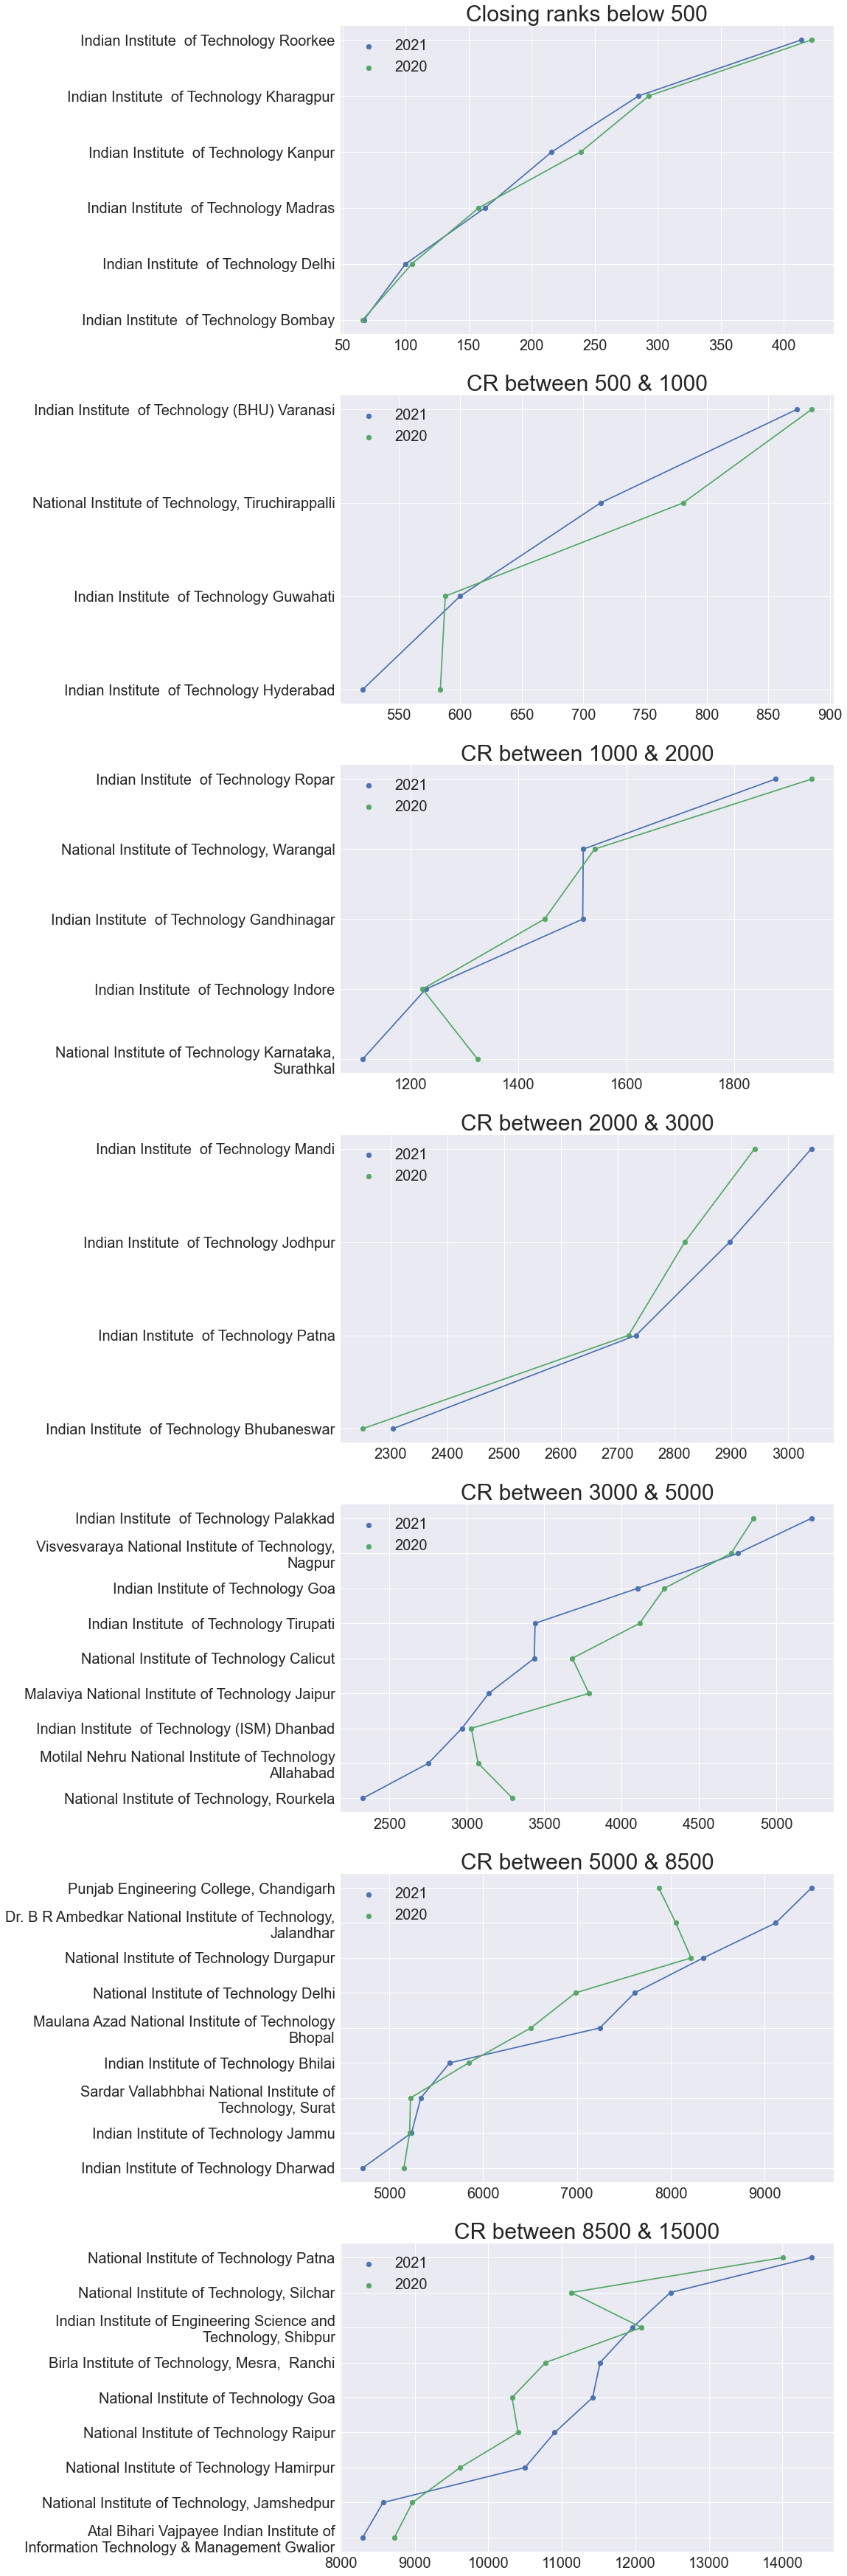

In [29]:
cse = 'Computer Science and Engineering (4 Years, Bachelor of Technology)'
limits = [500, 1000,2000,3000,5000,8500,15000]
plot_branch_info(cse,limits,'cse')

# Mechanical Engineering comparision

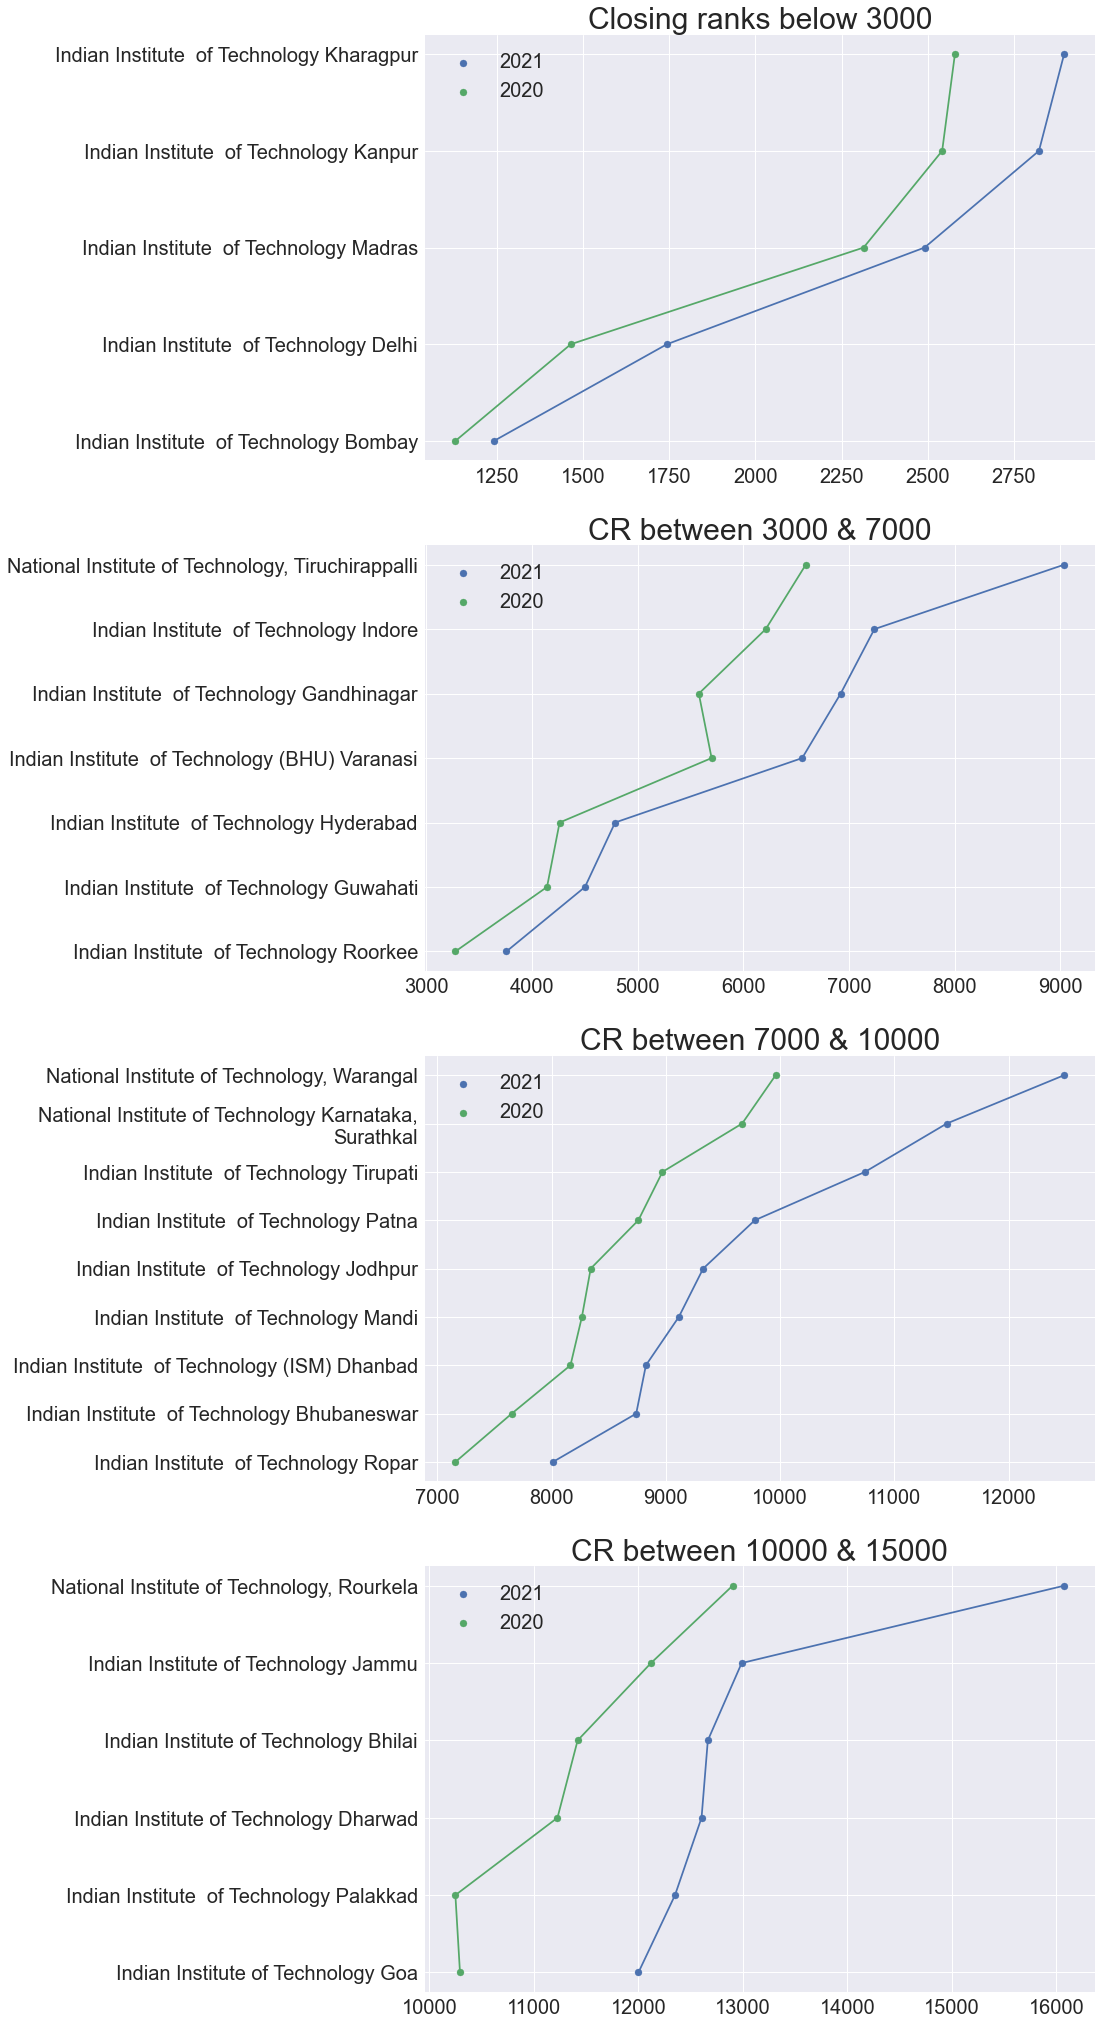

In [31]:
me = 'Mechanical Engineering (4 Years, Bachelor of Technology)'
limits = [3000,7000,10000,15000]
plot_branch_info(me,limits,'me')

## Other branches

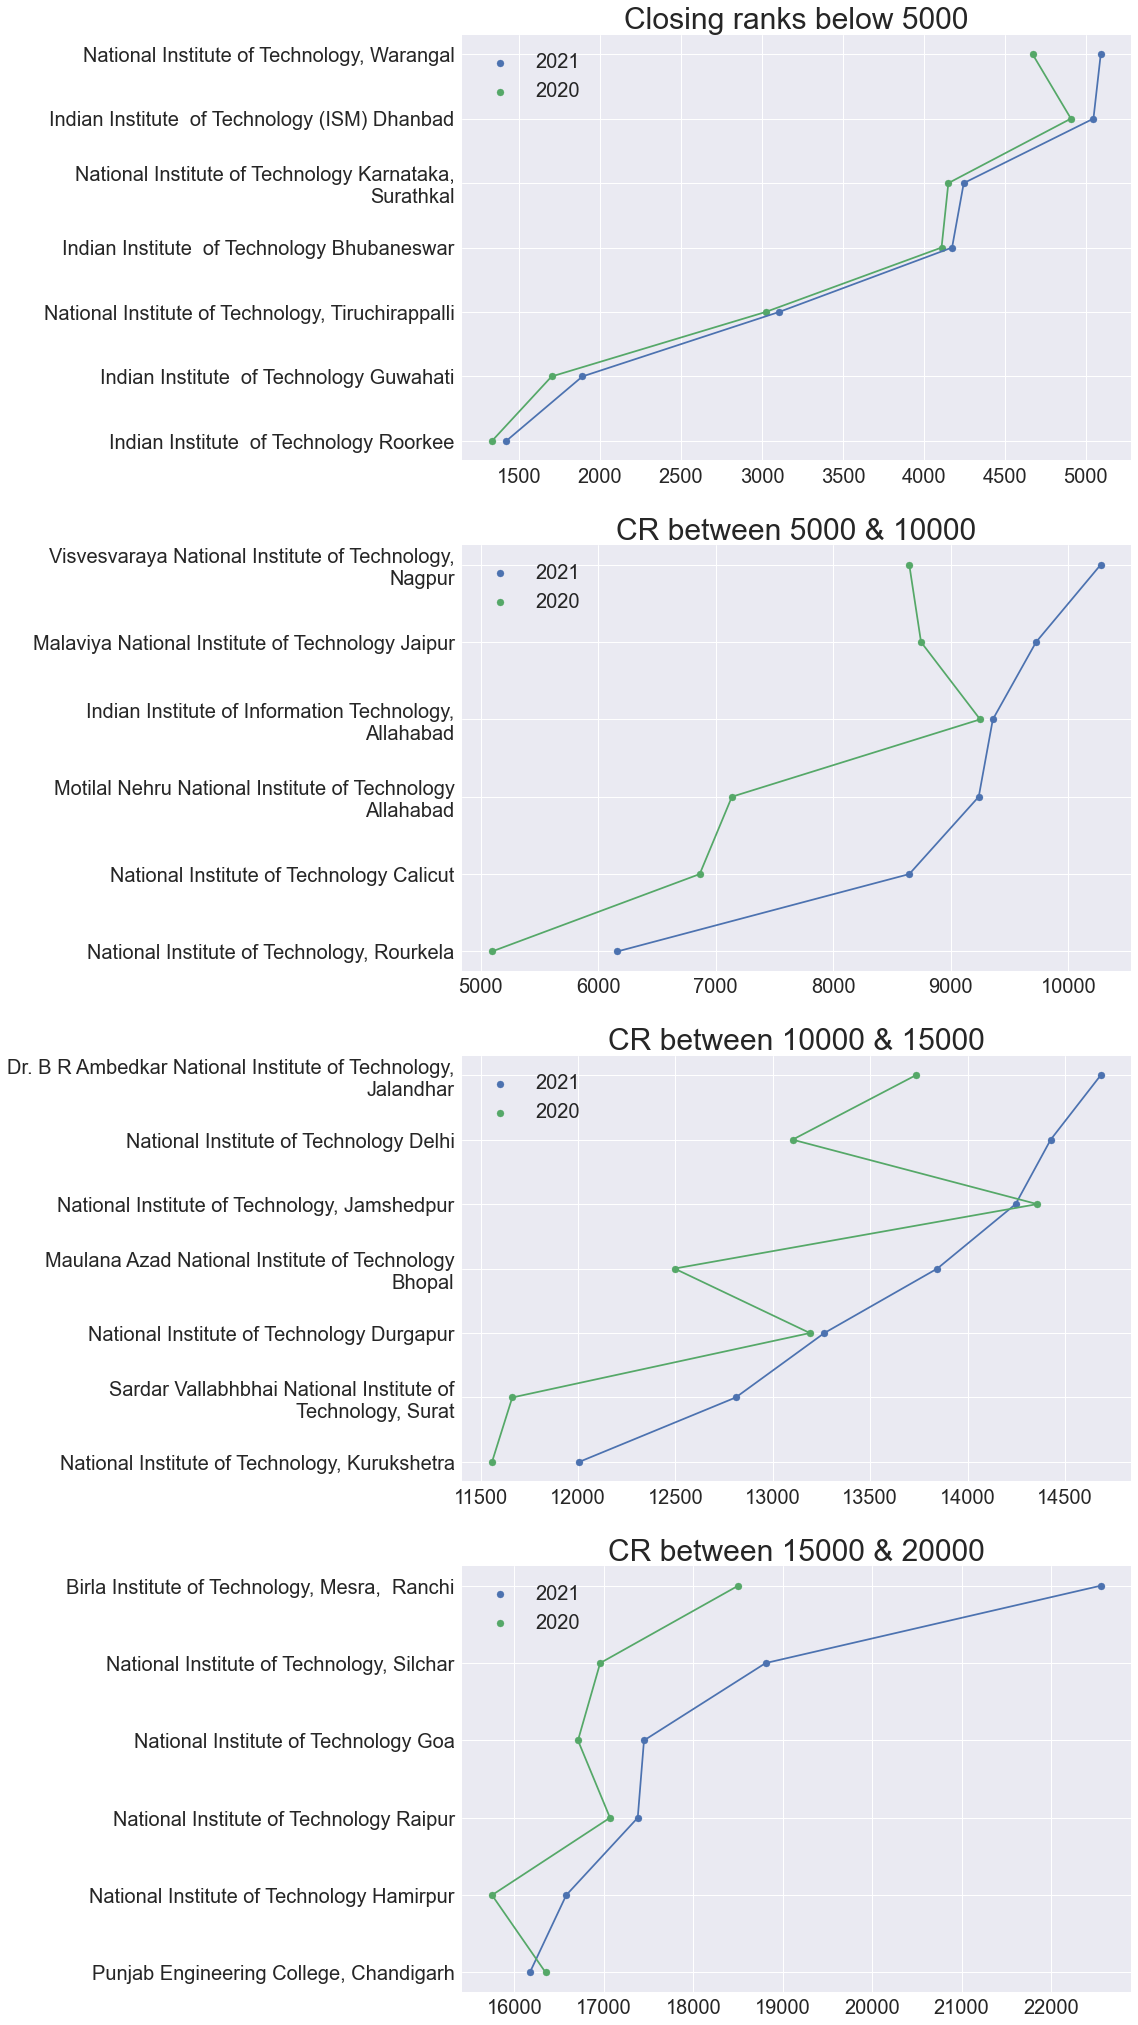

In [35]:
ece = 'Electronics and Communication Engineering (4 Years, Bachelor of Technology)'
limits = [5000,10000,15000,20000]
plot_branch_info(ece,limits,'ece')

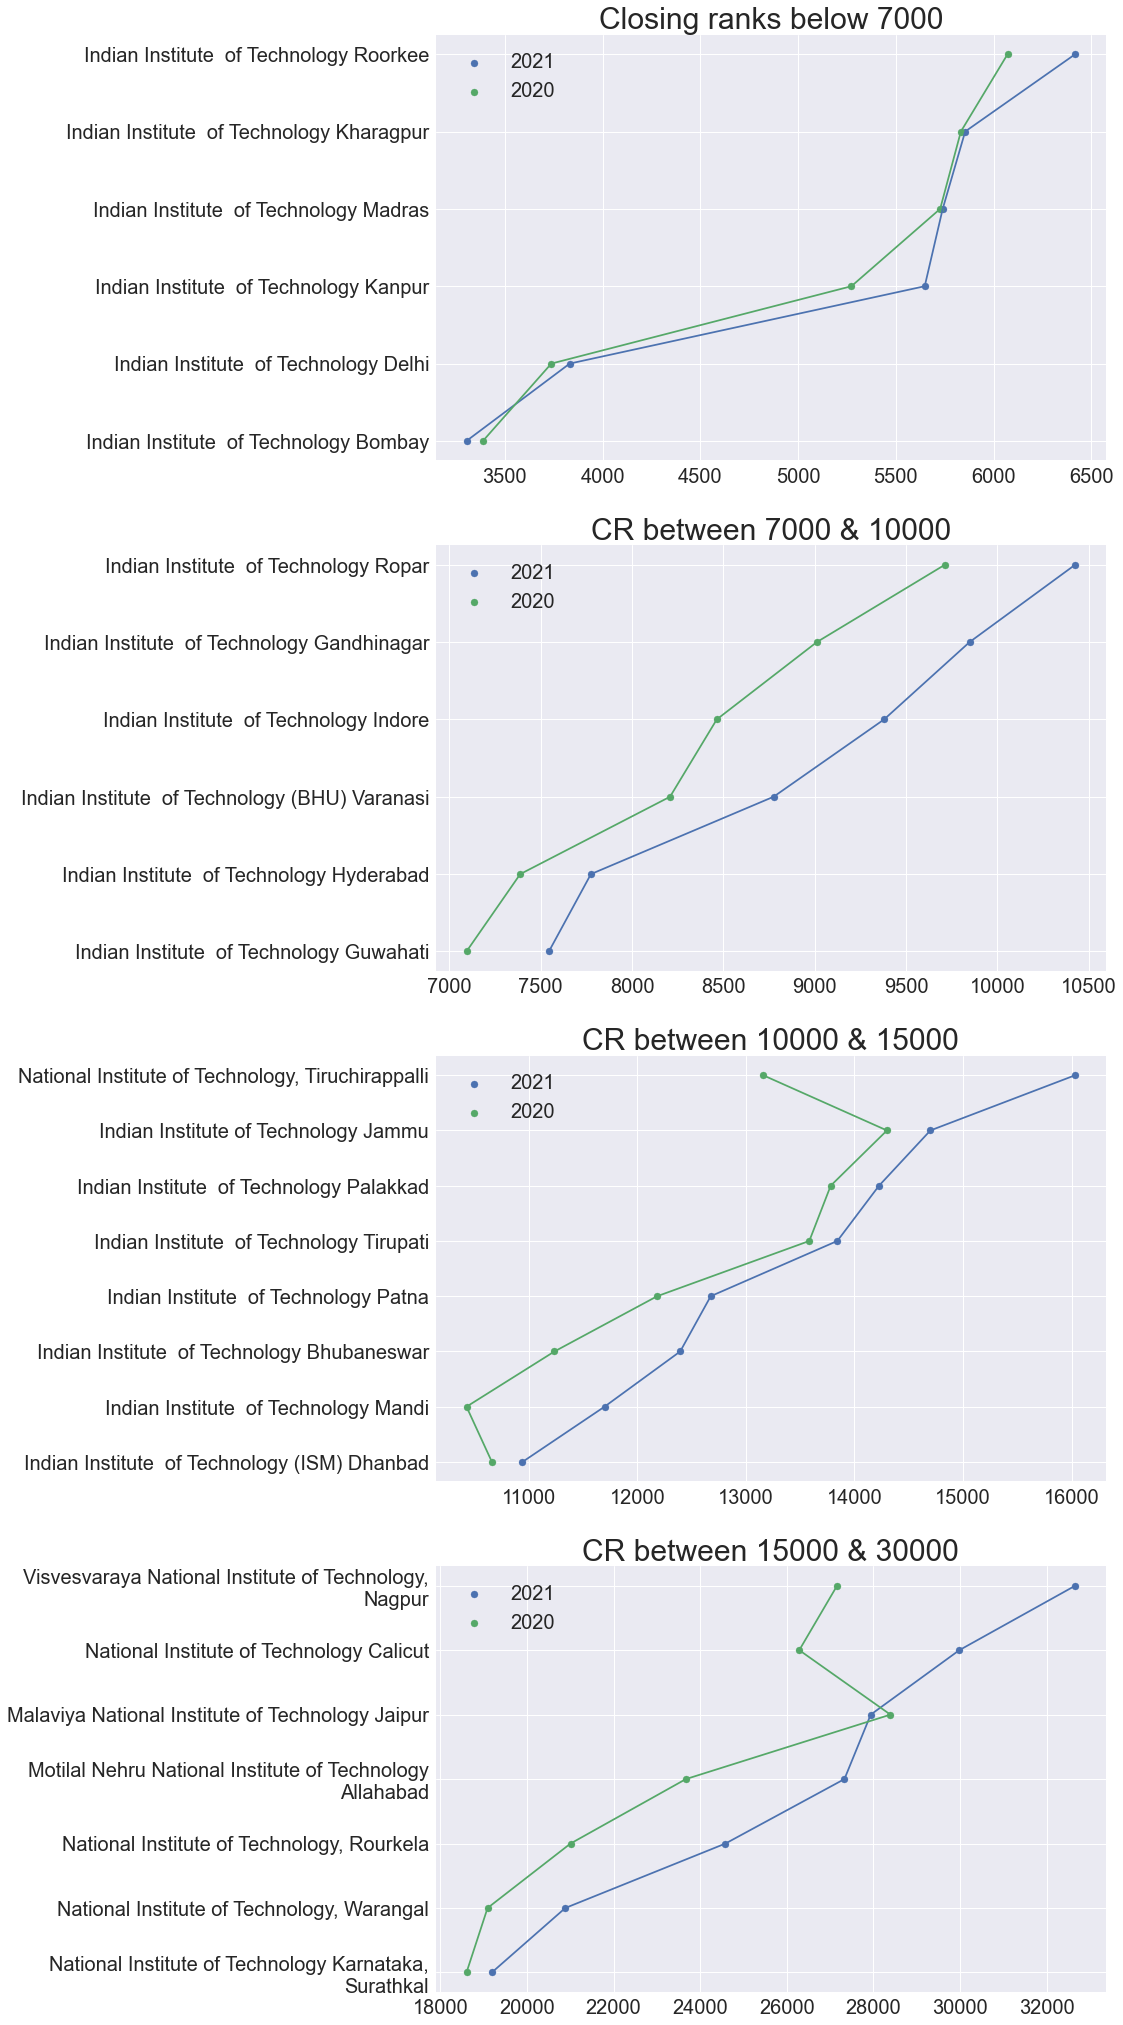

In [39]:
ce = 'Civil Engineering (4 Years, Bachelor of Technology)'
limits = [7000,10000,15000,30000]
plot_branch_info(ce,limits,'civil')

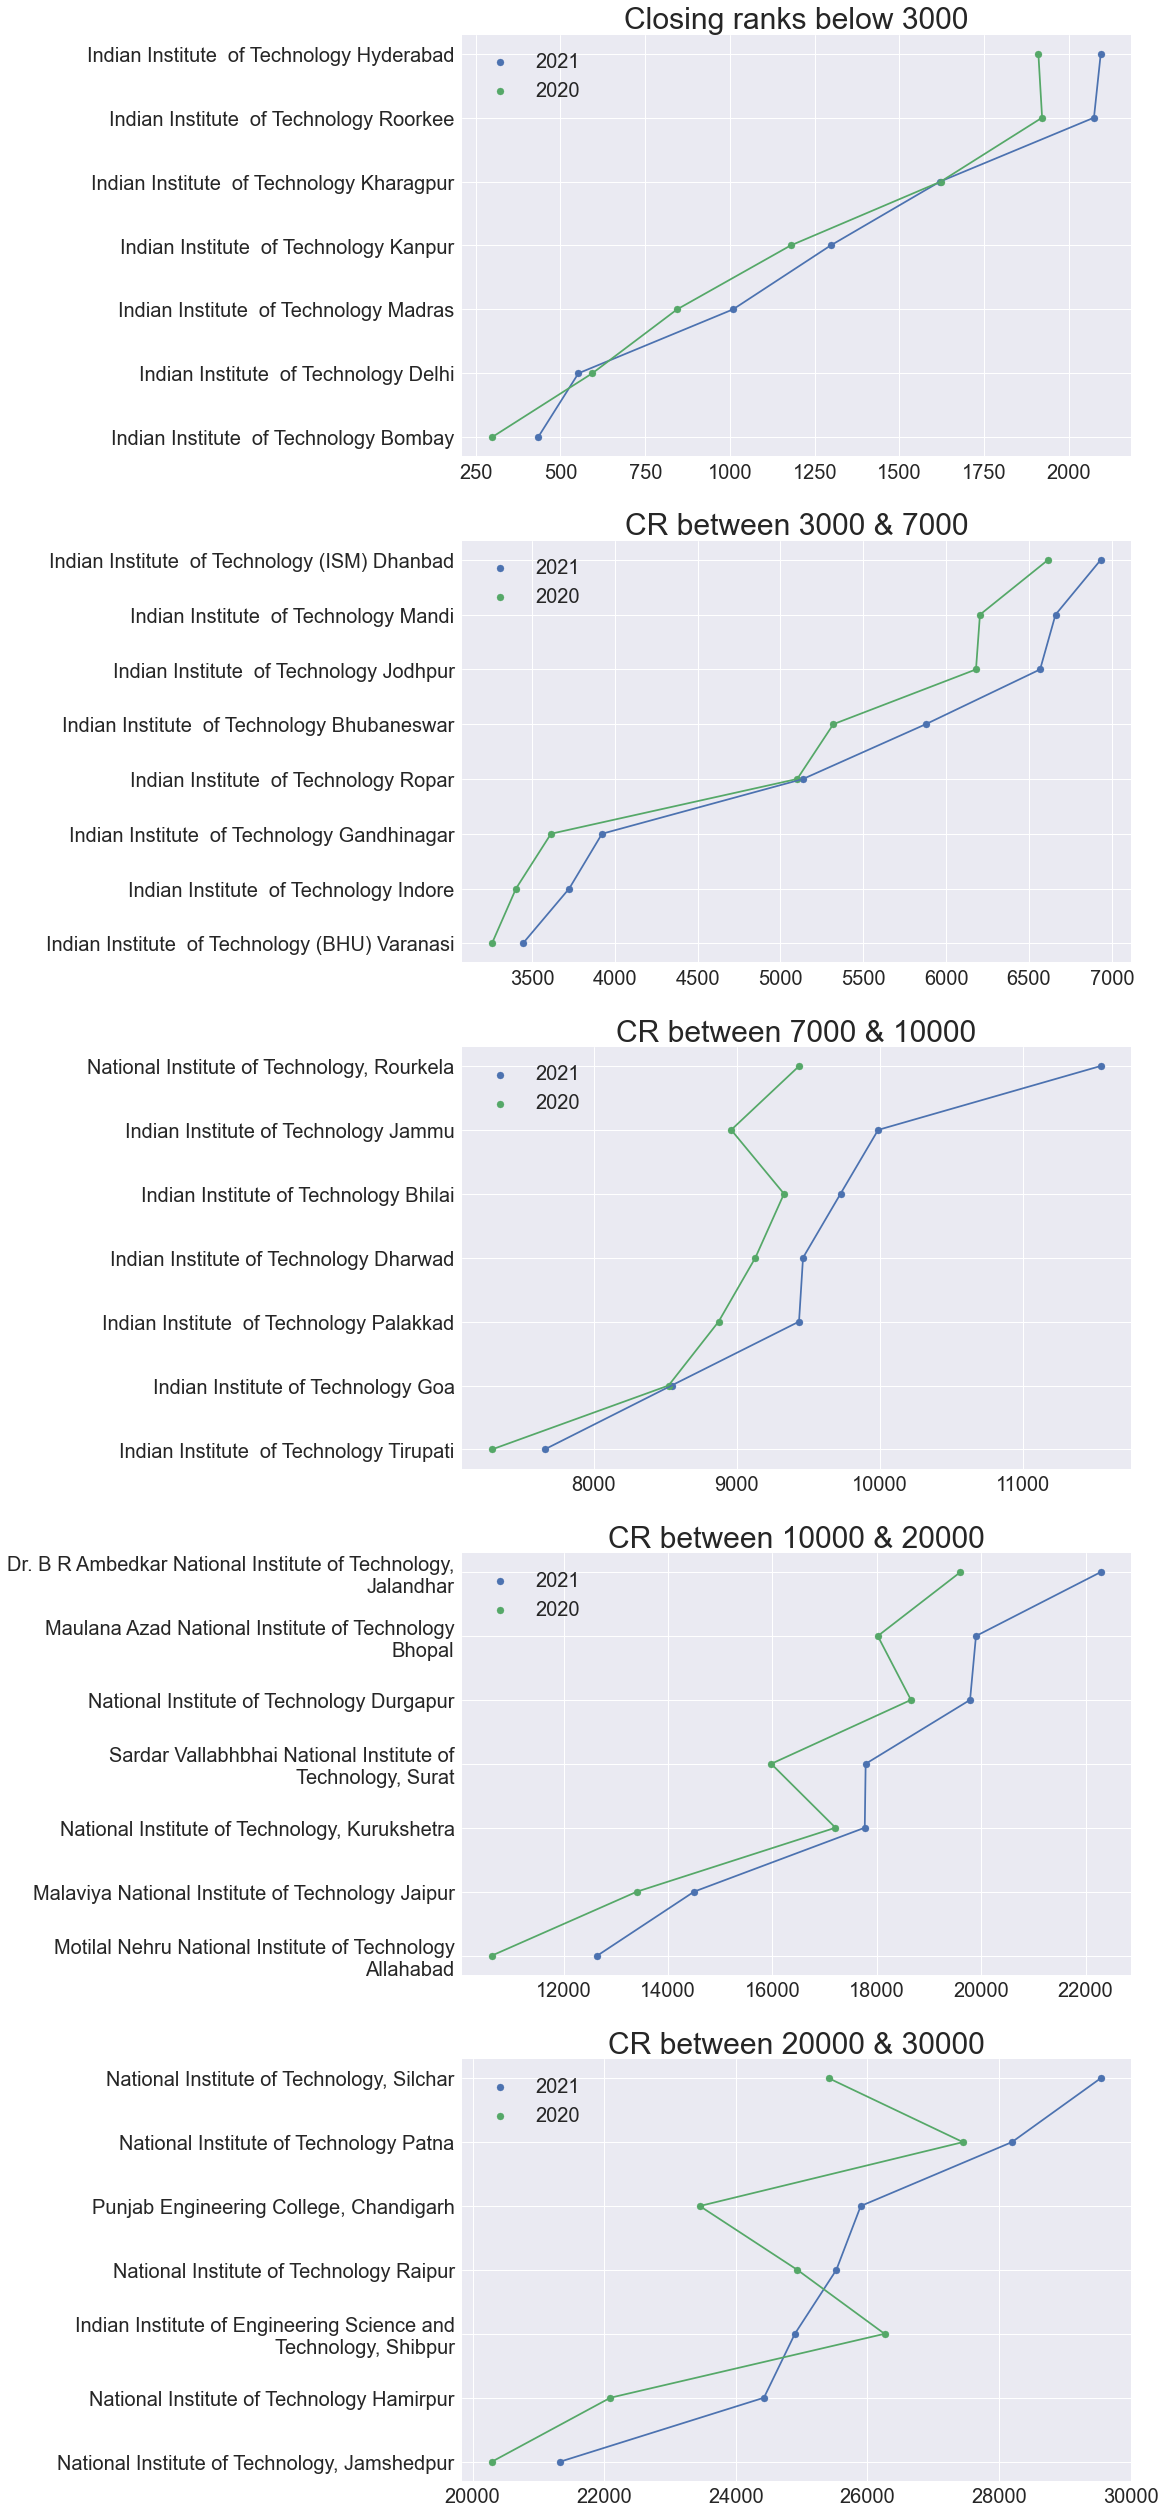

In [41]:
ee = 'Electrical Engineering (4 Years, Bachelor of Technology)'
limits = [3000,7000,10000,20000,30000]
plot_branch_info(ee,limits,'ee')